In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,NaN,0.99539,-0.05889,NaN,NaN,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,NaN,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,NaN,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,NaN,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,NaN,-0.32382,1.00000
4,1.0,0.0,NaN,-0.02401,0.94140,0.06531,0.92106,-0.23255,NaN,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,NaN,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,NaN,0.73739,-0.14706,0.84349,-0.05567,0.90441,NaN,...,0.95378,-0.04202,NaN,0.00123,1.00000,0.12815,NaN,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,NaN,0.00442,0.92697,-0.00577
349,1.0,NaN,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,NaN,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
float64		column 2	35
float64		column 3	34
float64		column 4	34
float64		column 5	69
float64		column 6	18
float64		column 7	34
float64		column 8	52
float64		column 9	34
float64		column 10	17
float64		column 11	34
float64		column 12	18
float64		column 13	52
float64		column 14	17
float64		column 15	34
float64		column 16	52
float64		column 17	52
float64		column 18	34
float64		column 19	17
float64		column 20	17
float64		column 21	35
float64		column 22	35
float64		column 23	18
float64		column 24	52
float64		column 25	52
float64		column 26	17
float64		column 27	52
float64		column 28	52
float64		column 29	17
float64		column 30	0
float64		column 31	34
float64		column 32	52
float64		column 33	51
float64		column 34	17


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,316.000000,316.0,317.000000,317.000000,282.000000,333.000000,317.000000,299.000000,317.000000,334.000000,...,299.000000,334.000000,299.000000,299.000000,334.000000,351.000000,317.000000,299.000000,300.000000,334.000000
mean,0.882911,0.0,0.650779,0.038119,0.593756,0.116419,0.548106,0.120470,0.519816,0.186688,...,0.450360,-0.085113,0.548958,-0.064584,0.379834,-0.027907,0.355076,0.002995,0.344004,0.021641
std,0.322036,0.0,0.472063,0.417269,0.516682,0.451391,0.474267,0.481919,0.491052,0.474292,...,0.521054,0.506965,0.498407,0.534055,0.566584,0.507974,0.554926,0.505787,0.491956,0.462815
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.470900,-0.058890,0.432488,-0.024390,0.231820,-0.042945,0.125860,-0.041953,...,0.030910,-0.370877,0.334320,-0.272310,0.000000,-0.236885,0.000000,-0.228570,0.000000,-0.143700
50%,1.000000,0.0,0.870480,0.016310,0.790760,0.019540,0.712160,0.015730,0.680650,0.023530,...,0.559840,-0.020205,0.687750,-0.016730,0.492210,0.000000,0.434840,0.000000,0.394765,0.000000
75%,1.000000,0.0,1.000000,0.168510,0.999537,0.315430,0.946160,0.361960,0.947210,0.525255,...,0.905240,0.147347,0.966810,0.143975,0.876750,0.154075,0.835240,0.198450,0.767567,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

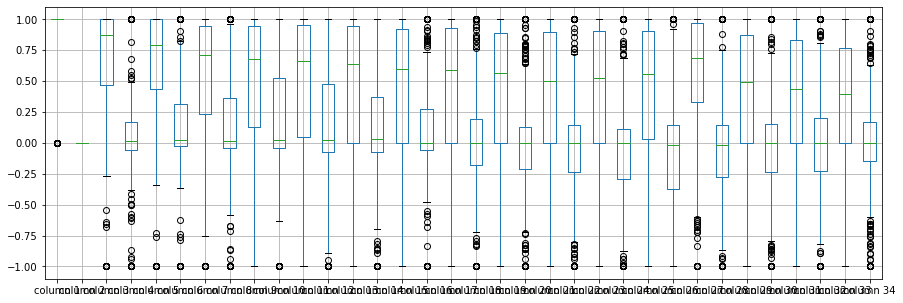

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.882911
column 2     0.000000
column 3     0.650779
column 4     0.038119
column 5     0.593756
column 6     0.116419
column 7     0.548106
column 8     0.120470
column 9     0.519816
column 10    0.186688
column 11    0.483055
column 12    0.150229
column 13    0.420852
column 14    0.088173
column 15    0.355874
column 16    0.083739
column 17    0.408986
column 18    0.019128
column 19    0.362810
column 20   -0.018924
column 21    0.342200
column 22   -0.012380
column 23    0.356590
column 24   -0.068488
column 25    0.450360
column 26   -0.085113
column 27    0.548958
column 28   -0.064584
column 29    0.379834
column 30   -0.027907
column 31    0.355076
column 32    0.002995
column 33    0.344004
column 34    0.021641
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.291262,0.019125,0.161493,0.117757,0.246596,-0.005768,0.193242,-0.052263,...,-0.017301,0.163482,-0.170356,-0.003815,0.160811,-0.119740,0.129899,-0.113606,0.165641,-0.012299
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.291262,NaN,1.000000,0.171608,0.516886,-0.044151,0.474657,-0.008221,0.475439,0.050061,...,0.262008,0.014562,0.113629,0.180033,0.329684,0.062618,0.267495,-0.004434,0.205085,-0.027528
column 4,0.019125,NaN,0.171608,1.000000,-0.018161,-0.243004,-0.064701,0.201084,-0.278491,0.168754,...,-0.079867,-0.201778,-0.016963,0.017562,-0.085932,0.389531,-0.157965,-0.073254,-0.238956,0.057221
column 5,0.161493,NaN,0.516886,-0.018161,1.000000,0.079336,0.566274,-0.080041,0.477902,-0.029873,...,0.214713,0.003105,0.150483,0.148901,0.309139,0.021307,0.374291,-0.025369,0.276643,-0.101038
column 6,0.117757,NaN,-0.044151,-0.243004,0.079336,1.000000,0.006902,0.365542,-0.145218,0.197183,...,-0.150321,-0.017761,-0.159007,-0.121919,0.039347,-0.159274,-0.145811,0.252372,0.049995,0.220472
column 7,0.246596,NaN,0.474657,-0.064701,0.566274,0.006902,1.000000,-0.094130,0.534425,-0.052354,...,0.259064,0.094576,0.112348,0.062555,0.300004,-0.020880,0.390107,0.018031,0.467099,-0.044495
column 8,-0.005768,NaN,-0.008221,0.201084,-0.080041,0.365542,-0.094130,1.000000,-0.368009,0.405291,...,-0.224956,-0.129038,-0.253361,0.075479,-0.128351,0.074954,-0.203620,0.135006,-0.121184,0.347587
column 9,0.193242,NaN,0.475439,-0.278491,0.477902,-0.145218,0.534425,-0.368009,1.000000,-0.255826,...,0.308646,0.093772,0.197641,0.187187,0.343273,0.018292,0.312982,-0.087846,0.312731,-0.081402
column 10,-0.052263,NaN,0.050061,0.168754,-0.029873,0.197183,-0.052354,0.405291,-0.255826,1.000000,...,-0.278131,0.006826,-0.240823,0.019704,-0.138725,-0.056024,-0.171365,0.023273,-0.162358,0.098068


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+30,34+30+30,34+30+30+30,34+30+30+30+30,34+30+30+30,34+30+30,34+30,34], vae_layer = False, seed = 300)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.964347476050968
Epoch: 1 , loss: 17.8916715440296
Epoch: 2 , loss: 17.83605026063465
Epoch: 3 , loss: 17.785818554106214
Epoch: 4 , loss: 17.706149464561825
Epoch: 5 , loss: 17.739197004409064
Epoch: 6 , loss: 17.644242922465008
Epoch: 7 , loss: 17.64002309526716
Epoch: 8 , loss: 17.661128498259046
Epoch: 9 , loss: 17.43467122032529
Epoch: 10 , loss: 17.392515999930247
Epoch: 11 , loss: 17.04486628941127
Epoch: 12 , loss: 16.434151467822847
Epoch: 13 , loss: 15.668199993315197
Epoch: 14 , loss: 15.583895002092634
Epoch: 15 , loss: 15.507759094238281
Epoch: 16 , loss: 15.479073342822847
Epoch: 17 , loss: 15.3405122756958
Epoch: 18 , loss: 15.395757675170898
Epoch: 19 , loss: 15.410359200977144
Epoch: 20 , loss: 15.201258341471354
Epoch: 21 , loss: 15.263050624302455
Epoch: 22 , loss: 15.380934170314244
Epoch: 23 , loss: 15.326356070382255
Epoch: 24 , loss: 15.202731041681199
Epoch: 25 , loss: 15.2129

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16    0.012876
column 17   -1.000000
column 18    0.008100
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22   -0.023967
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -0.012306
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,-0.000130,0.000000,0.000000,-0.173828,0.020104,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,-1.067824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.142249,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300002,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.999559,0.0,0.0
4,0.000000,0.000000,-0.669802,0.000000,0.000000,0.000000,0.000000,0.0,-0.450533,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.293682,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.000000,0.000000,-0.108746,0.000000,0.000000,0.000000,0.0,0.000000,0.084566,...,0.000000,0.0,-0.054615,0.0,0.000000,0.0,-0.244818,0.000000,0.0,0.0
347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,-0.183785,0.000000,0.0,0.0
349,0.000000,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.503346,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20.58262777574697

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.30065113753738953

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     0.291952
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.301635
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    0.265772
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.224535
column 30    0.233600
column 31    0.215640
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,-0.000130,0.995390,-0.058890,0.678602,0.043164,0.833980,-0.37708,1.000000,0.037600,...,0.568110,-0.51171,0.410780,-0.46168,0.212660,-0.34090,0.422670,-0.544870,0.18641,-0.45300
1,-0.067824,0.000000,1.000000,-0.188290,0.930350,-0.361560,-0.108680,-0.93597,1.000000,-0.045490,...,-0.061071,-0.26569,-0.204680,-0.18401,-0.190400,-0.11593,-0.166260,-0.062880,-0.13738,-0.02447
2,1.000000,0.000000,1.000000,-0.033650,1.000000,0.004850,0.699998,-0.12062,0.889650,0.011980,...,0.575280,-0.40220,0.589840,-0.22145,0.431000,-0.17365,0.604360,-0.241800,0.56045,-0.38238
3,1.000000,0.000000,1.000000,-0.451610,1.000000,1.000000,0.712160,-1.00000,0.000000,0.000000,...,1.000000,0.90695,0.516130,1.00000,1.000000,-0.20099,0.256820,0.000441,-0.32382,1.00000
4,1.000000,0.000000,0.330198,-0.024010,0.941400,0.065310,0.921060,-0.23255,0.320987,-0.163990,...,0.032860,-0.65158,0.132900,-0.53206,0.024310,-0.62197,0.236612,-0.595730,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0.000000,0.835080,-0.025766,0.737390,-0.147060,0.843490,-0.05567,0.904410,0.038346,...,0.953780,-0.04202,0.780175,0.00123,1.000000,0.12815,0.621782,-0.107140,0.90546,-0.04307
347,1.000000,0.000000,0.951130,0.004190,0.951830,-0.027230,0.934380,-0.01920,0.945900,0.016060,...,0.945200,0.01361,0.935220,0.04925,0.931590,0.08168,0.940660,-0.000350,0.91483,0.04712
348,1.000000,0.000000,0.947010,-0.000340,0.932070,-0.032270,0.951770,-0.03431,0.955840,0.024460,...,0.939880,0.03193,0.924890,0.02542,0.921200,0.02242,0.740805,0.004420,0.92697,-0.00577
349,1.000000,0.000017,0.906080,-0.016570,0.981220,-0.019890,0.956910,-0.03646,0.857460,0.001100,...,0.407154,-0.02099,0.891470,-0.07760,0.829830,-0.17238,0.960220,-0.037570,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NL_10(imp).xlsx", index=False, header=False)